<a href="https://colab.research.google.com/github/ananya-ayasi/2022_IBM_Code_Challenge_Wildfire-Detection-and-Burn-Severity-Analysis/blob/main/01_Wildfire_Detection_CNN_UAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook covers the training of a CNN architecture using UAV imagery, for wildfire detection.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [ ]:
classifier = Sequential() #arrange the Keras layers in a sequential order
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(64, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(128, (3, 3),  activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization())
classifier.add(Flatten())
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



*   Conv2D layers are generally used for achieving high accuracy in image recognition tasks.  
*   Pooling layers are used to reduce the dimensions of the feature maps. Thus, it reduces the number of parameters to learn and the amount of computation performed in the network. 
*   Batch normalization is the process to make neural networks faster and more stable through adding extra layers in a deep neural network.
*   Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image.
*   Dense Layer is simple layer of neurons in which each neuron receives input from all the neurons of previous layer, thus called as dense. Dense Layer is used to classify image based on output from convolutional layers.




In [ ]:
from keras.preprocessing.image import ImageDataGenerator

**The dataset was obtained from IEEE DataPort**


[THE FLAME DATASET: AERIAL IMAGERY PILE BURN DETECTION USING DRONES (UAVS)](https://ieee-dataport.org/open-access/flame-dataset-aerial-imagery-pile-burn-detection-using-drones-uavs)


Predicting fire behavior can help firefighters to have better fire management and scheduling for future incidents and also it reduces the life risks for the firefighters. This dataset consists of different repositories including raw aerial videos recorded by drones' cameras and also raw heatmap footage recorded by an infrared thermal camera. 

For this particular project, the 7th repository was chosen.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True,
validation_split=0.2) # set validation split

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/UAV/Train',
                                                 target_size = (64, 64),batch_size = 32,
                                                 class_mode = 'binary',subset='training')
valid_set = train_datagen.flow_from_directory('/content/drive/MyDrive/IBM/UAV/Train',
                                             target_size = (64, 64),batch_size = 32,
                                             class_mode = 'binary',subset='validation')

Found 31566 images belonging to 2 classes.
Found 7890 images belonging to 2 classes.


In [ ]:
cb_model_checkpoint = keras.callbacks.ModelCheckpoint('file_best.h5', 
                                                       save_best_only=True,
                                                       monitor='val_accuracy',mode='max',)

In [ ]:
classifier.fit(training_set,
               steps_per_epoch = 120,
               epochs = 5,
               validation_data = valid_set,
               validation_steps = 48,
               callbacks=[cb_model_checkpoint]
)

Epoch 1/5
120/120 [==============================] - 62s 513ms/step - loss: 0.0358 - accuracy: 0.9865 - val_loss: 7.2361 - val_accuracy: 0.4538
Epoch 2/5
120/120 [==============================] - 58s 484ms/step - loss: 0.0336 - accuracy: 0.9888 - val_loss: 0.1501 - val_accuracy: 0.9551
Epoch 3/5
120/120 [==============================] - 57s 474ms/step - loss: 0.0248 - accuracy: 0.9932 - val_loss: 0.0030 - val_accuracy: 0.9987
Epoch 4/5
120/120 [==============================] - 55s 458ms/step - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.5368 - val_accuracy: 0.8952
Epoch 5/5
120/120 [==============================] - 54s 448ms/step - loss: 0.0379 - accuracy: 0.9859 - val_loss: 1.1337 - val_accuracy: 0.7031


In [ ]:
classifier= keras.models.load_model("file_best.h5")

In [ ]:
classifier.save('classifier_99.h5')

In [ ]:
from keras.models import load_model
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
#returns a compiled model
classifier = load_model('classifier_99.h5')


def predict(img_path):
    test_image = image.load_img(img_path, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        prediction = 'notfire'
        return False
    else:
        prediction = 'fire'
        return True


Saving fire.jpg to fire (2).jpg
img1 =  True
 Fire Detected


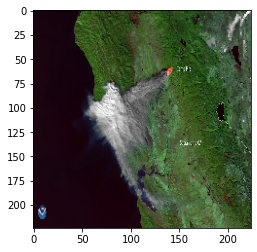

In [ ]:
uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img1 = predict(path)
  print("img1 = ", img1)
  img = image.load_img(path, target_size=(224, 224))
  plt.imshow(img)
  if img1==True:
    text=" Fire Detected"
  else:
    text= "Fire Not Detected"
  print('\033[1m' + text + '\033[0m')
  

In [ ]:
if img1==True:
  text=" Fire Detected"
else:
  text= "Fire Not Detected"
print('\033[1m' + text + '\033[0m')

 Fire Detected
